In [1]:
import pandas as pd
import numpy as np
from numpy.random import uniform, choice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from time import time

import warnings; 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

def check_null(df):
    null_val = pd.DataFrame()    
    Null_Count = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), 
                              columns=['Null_Count'])    
    Null_Percentage = pd.DataFrame(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending=False),
                                   columns=['Null_Percentage'])    
    return pd.concat([Null_Count, Null_Percentage], axis = 1)

C:\Users\Cloudy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Cloudy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Cloudy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


------------------------
## <font color = 'red'> K-Means Clustering </font>

------------------------

In [20]:
class kMeans_clustering:
    
    """
    What is remaining??
    -------------------
        > Stopping Criteria
    """
    
    def __init__(self, df, K, max_iter, target):
        """
            We need to have two variables as initial variables
            - df             --> data as a data frame.
            - K              --> number of clusters.
            - max_iterations --> This shows the max number of iterations 
                                    after which the algorithm will stop.
        """
        self.K = K
        self.max_iter = max_iter
        self.df = df.copy()
        self.df_w_labels = df.copy()        
        self.c_labels = []
        self.centroids = self.initialize_centroids()
        self.SSE_values = []
        

    def initialize_centroids(self):     
        """
            Random initialization for Centroids
        """
        min_ = np.min(self.df, axis=0)
        max_ = np.max(self.df, axis=0)
        cluster_centers = np.array([np.random.uniform(low = min_,high = max_) for _ in range(self.K)] )
        return cluster_centers


    def eucledian_distance(self, point1, point2):
        e_dist = np.sqrt(np.sum(np.square(point1 - point2)))        
        return e_dist
    
    
    def assign_cluster_labels(self):
        label = []
        for index,row in self.df.iterrows():
            row_ = np.array(row)
            dist = []            
            for cluster in self.centroids:                
                edist=self.eucledian_distance(cluster, row_)
                dist.append(edist)                
            label.append(np.argmin(dist, axis=0))            
        self.c_labels = label

    
    def updating_cluster_centroid(self):      
        n_samples, n_variables = self.df.shape        
        new_centroids = np.zeros(shape=(self.K, self.df.shape[1]))        
        for i in range(self.K):            
            temp_df = self.df_w_labels[self.df_w_labels['labels'] == i]           
            for j in range(n_variables):
                if not np.isnan(temp_df.iloc[:,j].mean()):
                    new_centroids[i][j] = temp_df.iloc[:,j].mean()
                else:
                    new_centroids[i][j] = 0
        self.centroids = new_centroids       
        return new_centroids    
    

    
    def sse(self):
        """
            Calculate Sum of Square Errors
            Variables used:
            - self.centroids
            - df_w_labels
            - 
        """
        sums = 0
        print("-----------------------------------------------")
        print(f"Unique_labels = {self.df_w_labels['labels'].unique()}")
        for i in self.df_w_labels['labels'].unique():       
            centroid = self.centroids[i]            
            temp_df = self.df_w_labels[self.df_w_labels['labels'] == i]
            temp_df.drop('labels', axis=1, inplace=True)            
            if len(centroid) > temp_df.shape[1]:    
                centroid = centroid[:-1].copy()
            sums_ = 0
            for index, row in temp_df.iterrows():
                r = np.array(row)
                sums_ += np.sum(np.square(r-centroid))
            
            # The below statement forbits the sum of interger and nan values
            if not np.isnan(sums_):
                sums += sums_
            
            # print(f"sums_ = {sums} AND sums = {sums}")
            # sums += self.sse(temp_df, centroid) 
        
        self.SSE_values.append(sums)
        return sums
        
    def stopping_condition(self, prev_sse, next_sse):
        """
            Returns: Boolean for Stopping Condition based on SSE
            For this we check the differences between two consecutive SSE errors.
            If this difference is less than 'differences', 
            the code will stop.
            
        """
        if abs(next_sse - prev_sse) < 200000:
            return True        
        return False
    
    
    
    def fit(self):
        self.assign_cluster_labels()                   # Assigning the Clusters intitally
        self.df_w_labels['labels'] = self.c_labels     # adding labels to the dataframe.
        
        for i in range(self.max_iter):            
            sse_value = self.sse()
            self.updating_cluster_centroid()
            self.assign_cluster_labels()
            self.df_w_labels['labels'] = self.c_labels
            print(f' Iteration --> {i+1} ; SSE -->  {sse_value} ')
            if i>1 and self.stopping_condition(self.SSE_values[-2],self.SSE_values[-1]) == True:
                print(f"Stopping Criteria Reached at Iteration - {i+1}!! ")
                break



In [21]:
path1 = r"G:\My Drive\[Study]\Data Mining\DM HW 4\Dataset 1 - dataset_diabetes\diabetes_clean.csv"
diabetes = pd.read_csv(path1)
diabetes.drop('Unnamed: 0', axis=1, inplace=True)
Y = diabetes['readmitted']
X = diabetes.drop('readmitted', axis=1)


start_time = time()
for k in range(2,6):
    kmeans = kMeans_clustering(X,K=k,max_iter=20,target=Y)
    kmeans.fit()
    sse_dict[k] = kmeans.SSE_values
    print("==============================================================================================")
end_time = time()
kmeans_run_time = end_time-start_time
print(f"KMeans Run time --> {kmeans_run_time//60} minutes")   

-----------------------------------------------
Unique_labels = [1 0]
 Iteration --> 1 ; SSE -->  329678993.31616783 
-----------------------------------------------
Unique_labels = [1 0]
 Iteration --> 2 ; SSE -->  28184323.73846071 
-----------------------------------------------
Unique_labels = [1 0]
 Iteration --> 3 ; SSE -->  27348144.508357838 
-----------------------------------------------
Unique_labels = [1 0]
 Iteration --> 4 ; SSE -->  27164254.7277797 
Stopping Criteria Reached at Iteration - 4!! 
-----------------------------------------------
Unique_labels = [1 2]
 Iteration --> 1 ; SSE -->  629607914.9743954 
-----------------------------------------------
Unique_labels = [1 2 0]
 Iteration --> 2 ; SSE -->  32923141.55019808 
-----------------------------------------------
Unique_labels = [1 2 0]
 Iteration --> 3 ; SSE -->  26941376.27838442 
-----------------------------------------------
Unique_labels = [1 0 2]
 Iteration --> 4 ; SSE -->  24316540.276142947 
----------

In [22]:
sse_val = []
k_val = [2,3,4,5]
for key, val in sse_dict.items():
    sse_val.append(val[-1])

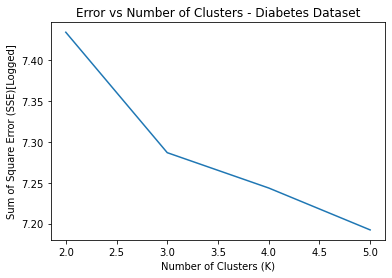

In [28]:

sns.lineplot(x=k_val, y=np.log10(sse_val))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Error (SSE)[Logged]")
plt.title("Error vs Number of Clusters - Diabetes Dataset")

plt.show()


In [27]:
sse_dict

{2: [329678993.31616783,
  28184323.73846071,
  27348144.508357838,
  27164254.7277797],
 3: [629607914.9743954,
  32923141.55019808,
  26941376.27838442,
  24316540.276142947,
  22337896.405264318,
  21101066.196697894,
  20213413.545738038,
  19718119.66789121,
  19473144.329610355,
  19354029.65048216],
 4: [384838091.56530046,
  29972654.395380206,
  19588056.44716303,
  18141967.212996285,
  17712450.646303117,
  17521701.12321706],
 5: [185358981.20506895,
  21181007.99235401,
  19534899.37498396,
  18719784.377767324,
  18080992.84030119,
  17614332.63308664,
  16826104.070266347,
  16290258.387039332,
  15980422.241691887,
  15752848.336097728,
  15571510.448173743]}

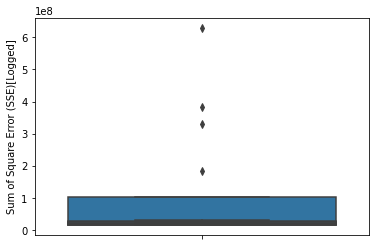

In [26]:
iterations = list(range(1,21))
sns.boxplot(y=sse_dict[2])
sns.boxplot(y=sse_dict[3])
sns.boxplot(y=sse_dict[4])
sns.boxplot(y=sse_dict[5])

plt.ylabel("Sum of Square Error")
# plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph objs as go

data = {'Errors': [], 'K Values': []}

for i, k in enumerate(K list):

data['Errors'] += list(errors ny[i])
data['K Values'] += [str(k)] ∗ len(errors ny[i])

df = pd.DataFrame(data)


fig = px.box(df, x='K Values', y='Errors', color='K Values', title='K-Means Clustering on NY Dataset')

# customize the boxplot
fig.update layout(xaxis title='Cluster Nos (K)', yaxis title='Errors Rates')
fig.show()

----------------------------
----------------------------